Variational AutoEncoder (VAE) with CelebA
===================================
---
Formation Introduction au Deep Learning  (FIDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 - Analyse our trained model
 - Load a saved model
 - Reconstruct some images
 - Latent space visualization
 - Matrix of generated images


## Step 1 - Setup environment
### 1.1 - Python stuff

In [1]:
import numpy as np
import scipy.stats
import os,sys,importlib
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import norm

import modules.vae
import modules.data_generator

reload(modules.data_generator)
reload(modules.vae)

from modules.vae  import VariationalAutoencoder
from modules.data_generator import DataGenerator

sys.path.append('..')
import fidle.pwk as ooo
importlib.reload(ooo)

ooo.init()

VariationalAutoencoder.about()
DataGenerator.about()


FIDLE 2020 - Practical Work Module
Version              : 0.2.8
Run time             : Tuesday 11 February 2020, 22:17:13
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf

FIDLE 2020 - Variational AutoEncoder (VAE)
TensorFlow version   : 2.0.0
VAE version          : 1.27

FIDLE 2020 - DataGenerator
Version              : 0.4


### 1.2 - The good place

In [2]:
place, dataset_dir = ooo.good_place( { 'GRICAD' : '/bettik/PROJECTS/pr-fidle/datasets/celeba',
                                       'IDRIS'  : f'{os.getenv("WORK","")}/datasets/celeba'    } )

train_dir    = f'{dataset_dir}/clusters.train'
test_dir     = f'{dataset_dir}/clusters.test'

Well, we should be at IDRIS !
We are going to use: /gpfswork/rech/mlh/uja62cb/datasets/celeba


## Step 2 - Get data

In [3]:
x_test   = np.load(f'{test_dir}/images-000.npy')

## Step 3 - Load best model

In [4]:
tag = 'CelebA.003'

vae=modules.vae.VariationalAutoencoder.load(tag, config='vae_config.json', weights='best_model.h5')

Model initialized.
Outputs will be in  : ./run/CelebA.003
Weights loaded from : ./run/CelebA.003/models/best_model.h5


## Step 4 - Image reconstruction

In [5]:
# ---- Choose few points

n_show = 8

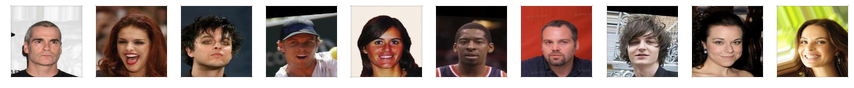

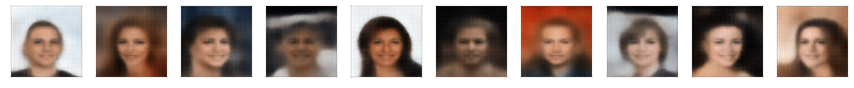

In [6]:
np.random.shuffle(x_test)

# ---- Get latent points and reconstructed images

z_test    = vae.encoder.predict(x_test)
x_reconst = vae.decoder.predict(z_test)

# ---- Just show it

ooo.plot_images(x_test[:10],    None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)
ooo.plot_images(x_reconst[:10], None, columns=10, x_size=1.5,y_size=1.5, spines_alpha=0.1)


## Step 5 - Latent space

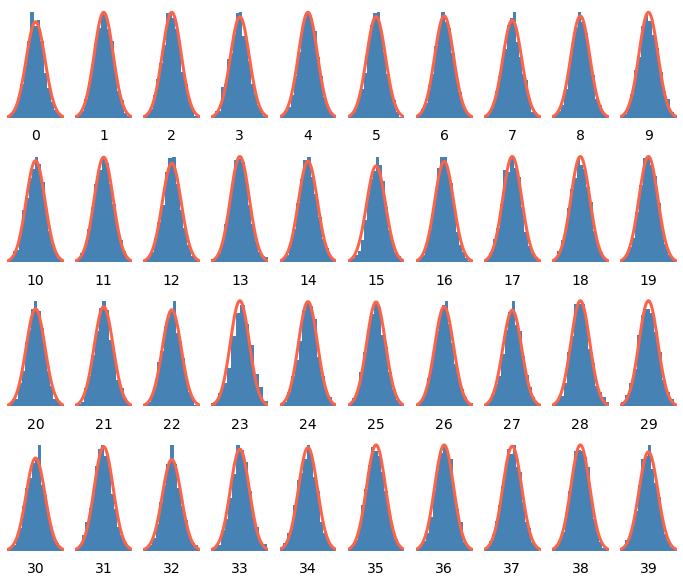

In [7]:
x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.set_xlim(-3,3)
    ax.text(0.5, -0.2, str(i), fontsize=14, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

## Step 6 - Generating new faces

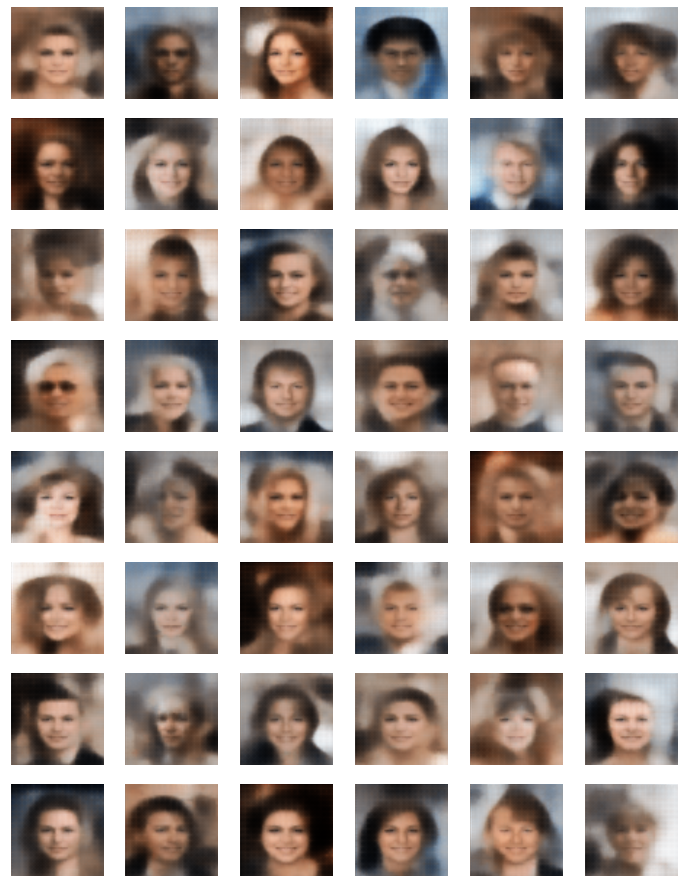

In [11]:
n_new = 48

z_new = np.random.normal( size=(n_new,vae.z_dim) )
x_new = vae.decoder.predict(z_new)

ooo.plot_images(x_new, None, columns=6, x_size=2,y_size=2, spines_alpha=0,y_padding=0)

----
That's all folks !